Generates data based on the ODEs

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Ion-channel constants and data
Gk = 0.1
Ek = -96.2

In [5]:
##FUNCTIONS
def sig2(v):
    """computes sigmoid function for m_tau"""
    vBreak = -79.1345
    offset1 = 0.27482
    amp1 =  38.4251
    vh1 = -53.4992
    slope1 = 5.0003
    offset2 = 0.54781
    amp2 = 5.6426
    vh2 = -18.1111
    slope2 = 12.5306
    
    sigswitch = 1/(1+np.exp((v-vBreak)/3.0))
    sig2 = (sigswitch*(offset1+(amp1)/(1+np.exp((v-vh1)/-slope1)))) + ((1-sigswitch)*offset2+(amp2-offset2)/(1+np.exp((v-vh2)/slope2)))
	
    return sig2


def func(p, t, p_inf, p_tau):
    """ode function"""
    dp = (p_inf - p) / p_tau
    return dp
    

In [6]:
#Import data
#stimulation
PATH_act = './experimental_data/Kv1.2/Exp/Kv1.2_2505_rep2_Stimulus.txt'
v_act = pd.read_csv(PATH_act, header=None, delim_whitespace=True).to_numpy().squeeze()

#current
PATH = './experimental_data/Kv1.2/Exp/Kv1.2_2505_rep2_Current.txt'
data = pd.read_csv(PATH, header=None, delim_whitespace=True)
t = data[0].to_numpy()
Ik = data.iloc[:, 1:]

In [7]:
#parameters true values
m_inf_true =  1/(1+np.exp((v_act + 8.1607)/-16.2041))
m_tau_true = sig2(v_act)
h_inf_true = (1-0.6669) +( 0.6669 / (1 + np.exp((v_act + 13.2501)/13.896)))
h_tau_true = 99.0499 +( 421.1463 / (1 + np.exp((v_act + 10.7858)/13.1357)))


#h, m, true values
m0 = np.zeros(len(v_act))
h0 = np.ones(len(v_act))
t = np.arange(0,499.5,0.1)
m_true = odeint(func, m0, t, args = (m_inf_true, m_tau_true))
h_true = odeint(func, h0, t, args = (h_inf_true, h_tau_true))
I_true =  Gk*m_true*m_true*h_true*(v_act-Ek)

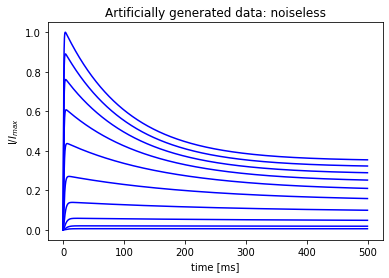

In [8]:
#Plot and Store
plt.title("Artificially generated data: noiseless")
plt.plot(t, I_true/I_true.max().max(), 'b')
plt.ylabel(r"I/$I_{max}$")
plt.xlabel("time [ms]")
plt.savefig("plots/surrogate_noiseless.svg")

#Store
pd.DataFrame(I_true/I_true.max().max()).to_csv("surrogate_noiseless.csv", index = False, header = None)

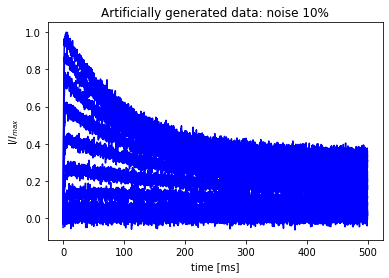

In [9]:
#ADD Noise = 0.1
noise = 0.1
I_noisy = I_true + noise * np.std(I_true) * np.random.randn(I_true.shape[0], I_true.shape[1])

plt.title("Artificially generated data: noise 10%")
plt.plot(t, I_noisy/I_noisy.max(), 'b')
plt.ylabel(r"I/$I_{max}$")
plt.xlabel("time [ms]")
plt.savefig("plots/surrogate_noise10.svg")
pd.DataFrame(I_noisy/I_noisy.max().max()).to_csv("surrogate_noise10.csv", index = False, header = None)

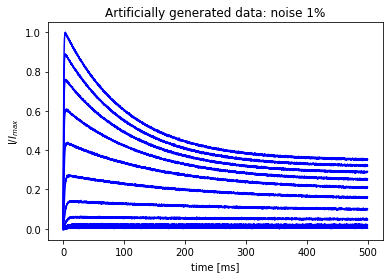

In [10]:
#ADD Noise = 0.01

noise = 0.01
I_noisy = I_true + noise * np.std(I_true) * np.random.randn(I_true.shape[0], I_true.shape[1])

plt.title("Artificially generated data: noise 1%")
plt.plot(t, I_noisy/I_noisy.max(), 'b')
plt.ylabel(r"I/$I_{max}$")
plt.xlabel("time [ms]")
plt.savefig("plots/surrogate_noise1.svg")
pd.DataFrame(I_noisy/I_noisy.max().max()).to_csv("surrogate_noise1.csv", index = False, header = None)